In [71]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt


In [72]:
mail=pd.read_csv('mail_data.csv')

In [73]:
print(mail)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [74]:
# Display the first few rows of the dataset
print(mail.head())


  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [75]:
# checking the number of rows and columns in the dataframe
mail.shape

(5572, 2)

In [76]:
# Remove duplicates
mail.drop_duplicates(inplace=True)

LABEL ENCODING

In [77]:
# label spam mail as 0;  ham mail as 1;

mail.loc[mail['Category'] == 'spam', 'Category',] = 0
mail.loc[mail['Category'] == 'ham', 'Category',] = 1

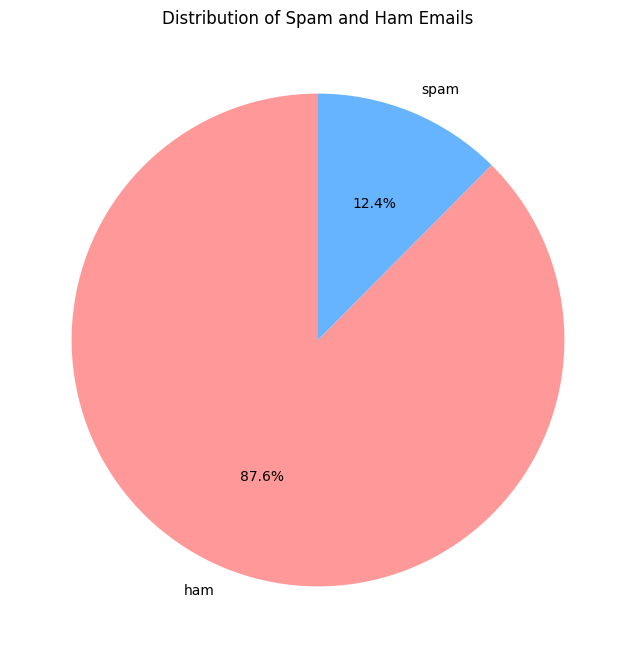

In [78]:
# Create a new column 'Label'
mail['Label'] = np.where(mail['Category'] == 0, 'spam', 'ham')

# Count the occurrences of each label
label_counts = mail['Label'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Distribution of Spam and Ham Emails')
plt.show()

In [79]:
# separating the data as texts and label

X = mail['Message']

Y = mail['Category']

In [80]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5157, dtype: object


Splitting the data into training data and testing data

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [82]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5157,)
(4125,)
(1032,)


In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Convert Y_train and Y_test values to integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')


In [84]:
print(X_train)

1786                   I dun believe u. I thk u told him.
3576    And do you have any one that can teach me how ...
420     Send a logo 2 ur lover - 2 names joined by a h...
5156    Sir, I need Velusamy sir's date of birth and c...
3354    I emailed yifeng my part oredi.. Can ü get it ...
                              ...                        
809          I am taking half day leave bec i am not well
993     Up to ü... Ü wan come then come lor... But i d...
1726    You know there is. I shall speak to you in  &l...
3525    Yeah that'd pretty much be the best case scenario
1748                     I think u have the wrong number.
Name: Message, Length: 4125, dtype: object


In [85]:
print(X_train_features)

  (0, 6692)	0.48303813512243965
  (0, 6605)	0.4898673616987752
  (0, 1247)	0.5538832733861689
  (0, 2400)	0.4689535663823655
  (1, 1592)	0.5594126567616489
  (1, 5859)	0.5964494866231046
  (1, 6492)	0.5755914257195885
  (2, 300)	0.16113294658934302
  (2, 820)	0.24488128414489752
  (2, 6835)	0.24488128414489752
  (2, 5064)	0.22967525805125708
  (2, 7355)	0.21568440262445418
  (2, 682)	0.22967525805125708
  (2, 25)	0.24488128414489752
  (2, 2564)	0.19505111090227498
  (2, 798)	0.24488128414489752
  (2, 4393)	0.24488128414489752
  (2, 4520)	0.24488128414489752
  (2, 4519)	0.24488128414489752
  (2, 4084)	0.2644704778405301
  (2, 6828)	0.13848562282513652
  (2, 3252)	0.18176623831152225
  (2, 3695)	0.21568440262445418
  (2, 4522)	0.2363176943466334
  (2, 4089)	0.2196593047164816
  :	:
  (4120, 1223)	0.5846719438819551
  (4120, 6456)	0.4751891362657192
  (4120, 3181)	0.4285103741434733
  (4120, 3921)	0.39220487670240334
  (4120, 2101)	0.30807173962343376
  (4121, 5968)	0.4786671802830861
  (

In [86]:
# Original Logistic Regression Model
model = LogisticRegression()

In [87]:
# Training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

In [88]:
# Prediction on training data
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data: ', accuracy_on_training_data)

Accuracy on training data:  0.961939393939394


In [89]:
# Prediction on test data
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data: ', accuracy_on_test_data)

Accuracy on test data:  0.9544573643410853


In [90]:
# SMOTE
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train_features, Y_train)

In [91]:
# Predictions
y_pred_smote = logreg_smote.predict(X_test_features)

In [92]:
# Evaluate the model with SMOTE
print("Classification Report with SMOTE:\n", classification_report(Y_test, y_pred_smote))


Classification Report with SMOTE:
               precision    recall  f1-score   support

           0       0.98      0.88      0.92       139
           1       0.98      1.00      0.99       893

    accuracy                           0.98      1032
   macro avg       0.98      0.94      0.96      1032
weighted avg       0.98      0.98      0.98      1032



In [93]:
# ROC Curve with SMOTE
y_prob_smote = logreg_smote.predict_proba(X_test_features)[:, 1]
fpr_smote, tpr_smote, thresholds_smote = roc_curve(Y_test, y_prob_smote)
roc_auc_smote = auc(fpr_smote, tpr_smote)

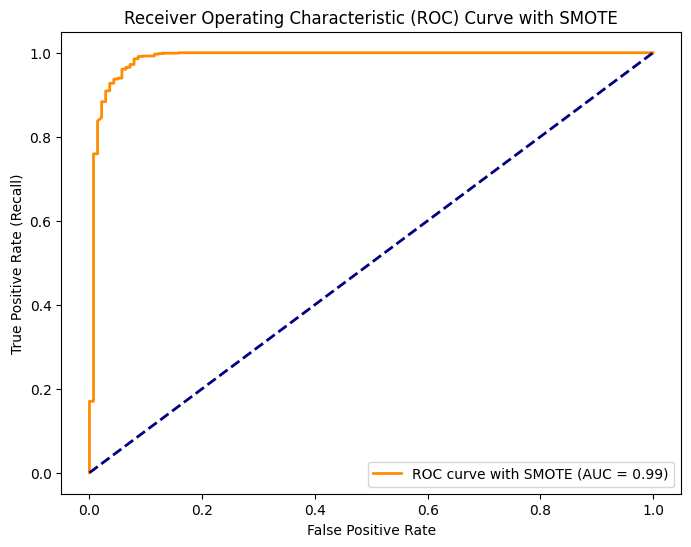

In [94]:
# Plot the ROC curve with SMOTE
plt.figure(figsize=(8, 6))
plt.plot(fpr_smote, tpr_smote, color='darkorange', lw=2, label=f'ROC curve with SMOTE (AUC = {roc_auc_smote:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve with SMOTE')
plt.legend(loc='lower right')
plt.show()

In [95]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail
